# ✅ Wine Classification using Decision Tree and Random Forest

## 📝 Project Overview

This project applies **Decision Tree** and **Random Forest** algorithms to classify different types of wine using the UCI Wine dataset from Scikit-learn.

You will learn:

- What Decision Trees and Random Forests are
- When to use Decision Tree vs Random Forest
- How to implement both models using Scikit-learn
- How to perform exploratory data analysis (EDA) including distributions, boxplots, and heatmaps
- How to evaluate classification models using Accuracy, Confusion Matrix, Classification Report
- How to visualize feature importances and a decision tree


🌳 What is a Decision Tree?

A Decision Tree is a flowchart-like structure used for both classification and regression. It splits the data based on feature values into branches, helping the model decide outcomes.

Example:

If age > 18 → go right

Else → go left

Each leaf node represents a prediction.

🌲 What is a Random Forest?

A Random Forest is a collection (ensemble) of many Decision Trees. Each tree sees a different sample of data and features. The final prediction is made by averaging (regression) or majority vote (classification).

📌 Random Forest is usually more accurate and less overfitting than a single decision tree.

✅ When to Use: Decision Tree vs Random Forest

| Feature         | **Decision Tree**                                   | **Random Forest**                                                     |
| --------------- | --------------------------------------------------- | --------------------------------------------------------------------- |
| **Best for**    | Quick interpretability                              | High accuracy & robustness                                            |
| **Model Type**  | Single tree                                         | Ensemble of many trees                                                |
| **Overfitting** | High risk of overfitting                            | Reduced risk (due to averaging)                                       |
| **Speed**       | Faster to train & easier to visualize               | Slower (builds multiple trees)                                        |
| **Use case**    | When you need a clear explanation of decision logic | When you need better performance even if model is harder to interpret |
| **Example**     | Medical diagnosis explanation                       | Image classification, customer churn prediction                       |

 🔍 Summary:
                                                                                              
Use Decision Trees when:

-You want a simple, explainable model.

-You’re okay with slightly lower performance.

-Visualizing decisions matters (e.g., in presentations or compliance).

Use Random Forests when:

-You want better accuracy and can trade off interpretability.

-You’re working with more complex datasets.

-You want to reduce overfitting and improve generalization.

                                                                                             

## 📦 Dataset Used

**Name**: Wine Dataset  
**Source**: `sklearn.datasets.load_wine()`  
**Target classes**:  
- 0 = Class_0  
- 1 = Class_1  
- 2 = Class_2  

The dataset contains **178 samples** and **13 numerical features** related to wine chemical composition.


📦 Step 1: Load the Wine Dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Dataset
wine_data = load_wine() # load_wine() loads the dataset.

# Convert to Dataframe
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df["target"] = wine_data.target # df['target'] is added to store the wine class (0, 1, 2).

# View the first 5 rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 📌 Steps Performed

1. Loaded the Wine dataset using Scikit-learn
2. Converted it to a Pandas DataFrame for easy manipulation
3. Performed initial EDA:
   - Dataset shape, columns, data types, and target distribution
4. Plotted:
   - Histograms for feature distributions
   - Boxplots grouped by wine class
   - Feature correlation heatmap
5. Split the data into training and testing sets
6. Trained a Decision Tree Classifier
7. Evaluated the Decision Tree:
   - Accuracy Score
   - Confusion Matrix
   - Classification Report
8. Trained a Random Forest Classifier (with 100 estimators)
9. Evaluated the Random Forest model
10. Plotted:
    - Feature Importances
    - One sample Decision Tree from the Random Forest


## 🔍 Data Exploration

We performed basic data checks to understand the structure of the dataset:

- `df.info()` to inspect column data types and nulls
- `df.describe()` to understand summary statistics
- Target class distribution using `value_counts()`


## EDA 📊

✅ Step 2: Basic Exploration of the Wine Dataset

In [2]:
# Basic Structure
print("Shape of Dataset:",df.shape)

# Preview of data
print(df.head())

# Target class distribution
print("\nTarget Class Distribution:")
print(df["target"].value_counts())

# Data types and missing values
print("\nDataset Info")
print(df.info())

# Summary statistics
print("\nSummery Statistics")
print(df.describe())

Shape of Dataset: (178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  p

## 📊 Data Visualization

We explored the data visually using:

- Plot class distribution (bar plot)
- Histograms for selected features (`alcohol`, `malic_acid`, `ash`, `color_intensity`)
- Boxplots grouped by wine class (`target`)
- Correlation Heatmap to find relationships among features


Step 3: Data Visualization 

*Step 3.1 – Plot Class Distribution (Bar Plot)*

This helps us understand the balance of classes in the dataset — whether each class (wine type) has enough samples or is imbalanced.

C:\Users\lucky\AppData\Local\Temp\ipykernel_4288\95208143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="target", palette="Set2")


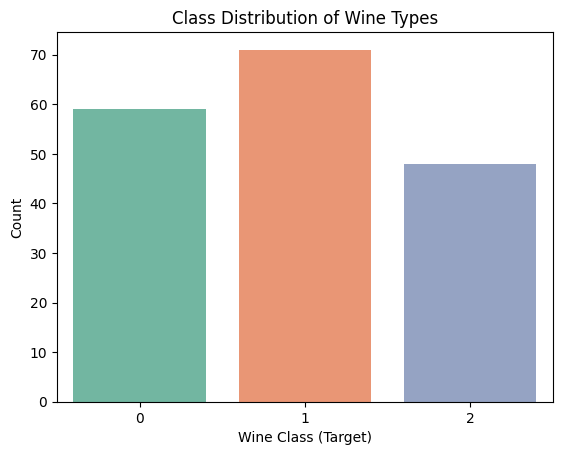

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(df, x="target", palette="Set2")
plt.title("Class Distribution of Wine Types")
plt.xlabel("Wine Class (Target)")
plt.ylabel("Count")
plt.show()

🔍 What we learned:

Class 1 has the most wine samples.

Class 2 has the least.

The dataset is fairly balanced, but Class 1 dominates slightly — it’s important to note this when evaluating model performance later.

*step 3.2 – Visualize Feature Distributions Using Histograms*

This helps us understand:

The range of each feature,
Whether data is normally distributed or skewed,
If scaling/normalization may be needed later.

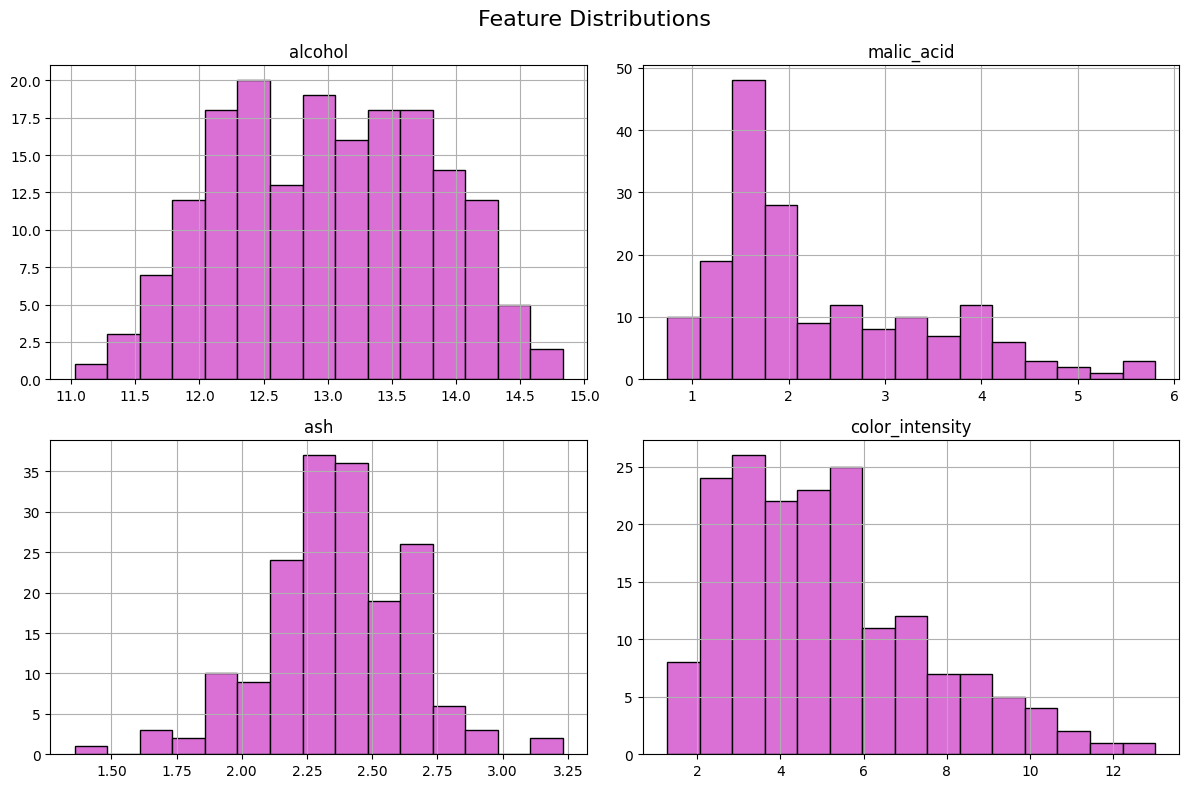

In [4]:
# Select a few key features to visualize
features_to_plot = ["alcohol", "malic_acid", "ash", "color_intensity"]

# Plot histograms
df[features_to_plot].hist(bins=15, figsize=(12,8), color="orchid", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show() # plt.suptitle(...) → Adds a common title above all histograms.

🔍 Quick insights from plots:

alcohol and ash look roughly normally distributed (bell-shaped).

malic_acid and color_intensity are right-skewed — many samples have lower values, with a few high-value outliers.

This helps us understand data distribution and decide whether scaling or log transformation may be useful later.

*step 3.3 – Use Boxplots to Compare Features Across Classes*

Boxplots help us:
Compare how feature values differ by class (0, 1, 2).
Spot outliers and class-wise spread/median differences.

C:\Users\lucky\AppData\Local\Temp\ipykernel_4288\2747741126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="target", y=feature, palette="Set3")
C:\Users\lucky\AppData\Local\Temp\ipykernel_4288\2747741126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="target", y=feature, palette="Set3")
C:\Users\lucky\AppData\Local\Temp\ipykernel_4288\2747741126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="target", y=feature, palette="Set3")
C:\Users\lucky\AppData\Local\Temp\ipykernel_4288\2747741126.py:9: FutureWarning: 


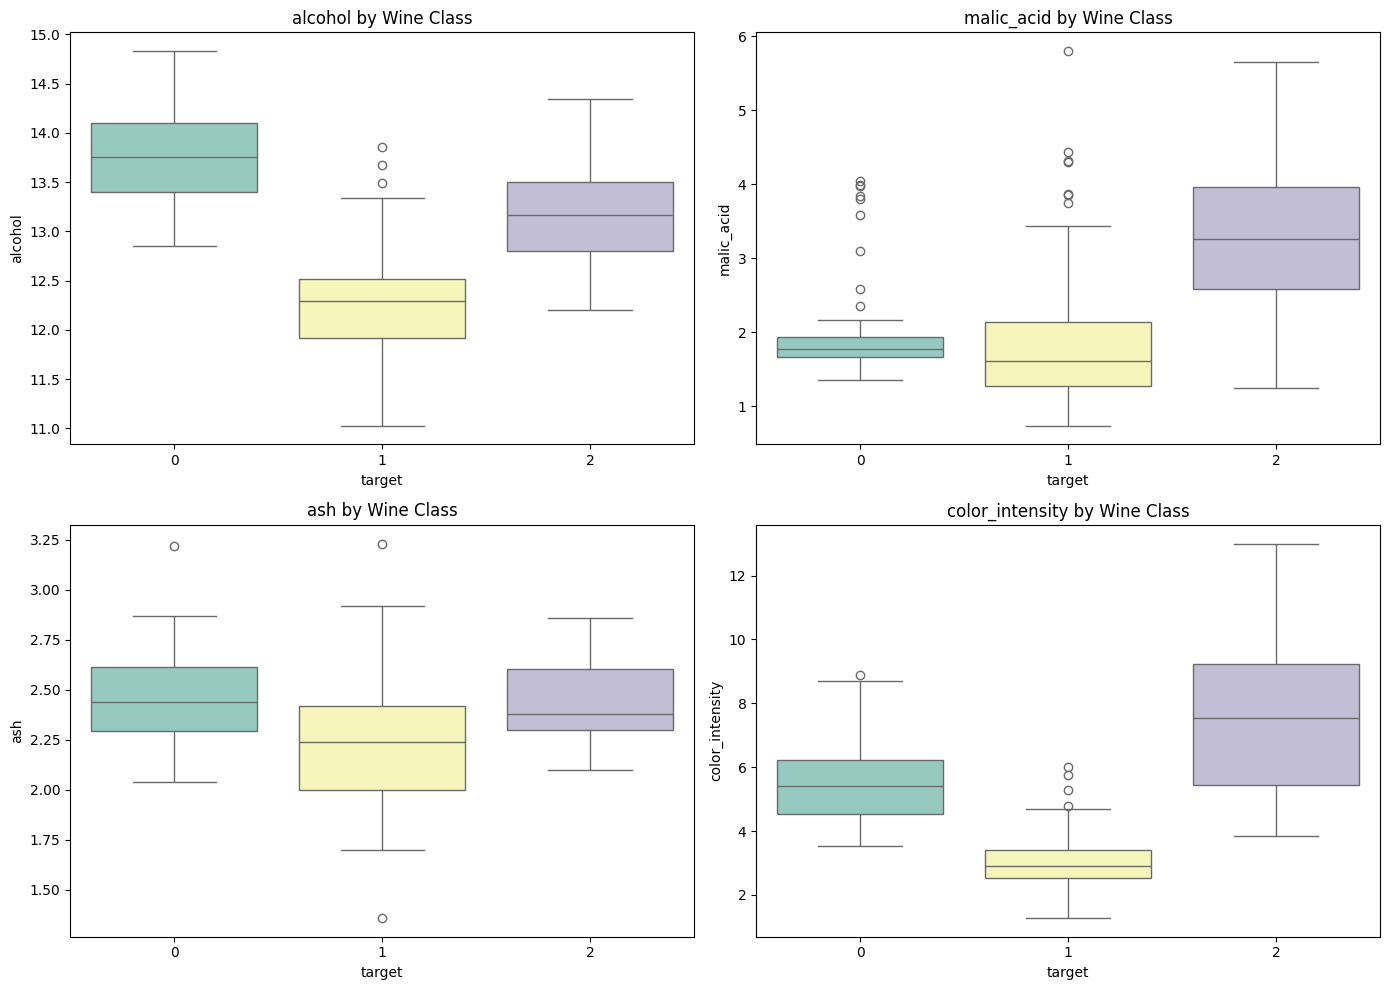

In [5]:
# List of Features to compare
features_to_plot = ["alcohol", "malic_acid", "ash", "color_intensity"]

# Plot one boxplot per feature
plt.figure(figsize=(14,10))

for i, feature in enumerate(features_to_plot,1):
    plt.subplot(2,2,i)
    sns.boxplot(df, x="target", y=feature, palette="Set3")
    plt.title(f"{feature} by Wine Class")

plt.tight_layout()
plt.show()

🔍 What the Boxplots Show:

Alcohol: Class 1 has lower median alcohol than Class 0 and 2.

Malic Acid: Clear increase from Class 0 → 1 → 2.

Ash: Slight overlap, but Class 1 shows slightly lower values.

Color Intensity: Class 2 has higher values with many outliers.

This confirms that some features are quite discriminative, which helps decision trees perform well. 

*Step 3.4 - Correlation Heatmap (Optional but Insightful)*

Let’s:Explore correlations between features and Identify if some features are highly correlated (→ potential redundancy).

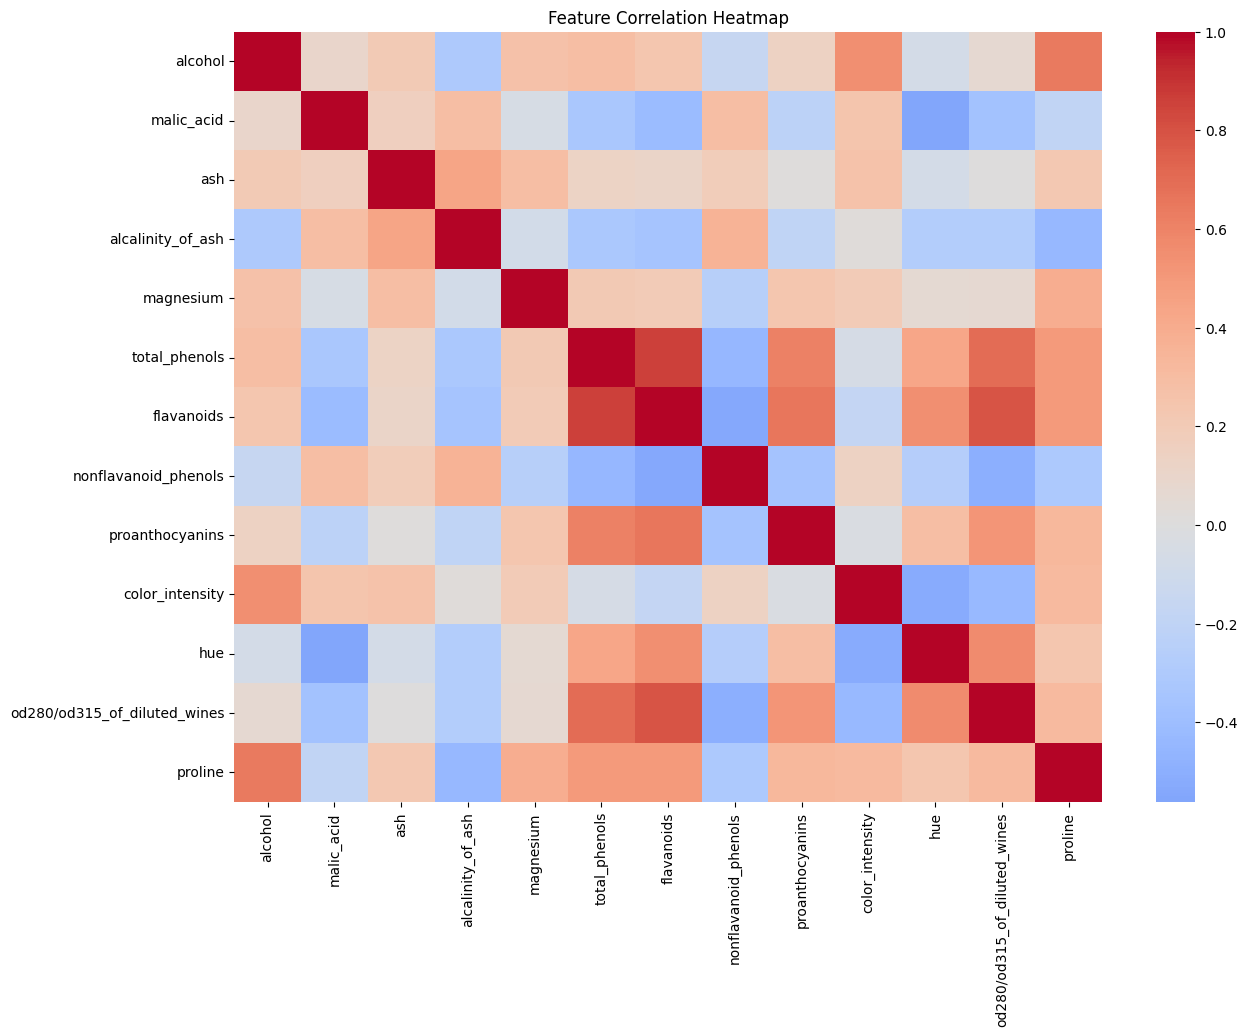

In [6]:
# Calculate correlation matrix
corr_matrix = df.drop("target", axis=1).corr()

# set the plot size
plt.figure(figsize=(14,10))

# create Heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

🔍 What We Learned from the Heatmap:

Highly correlated features (dark red):

flavanoids, total_phenols, and od280/od315_of_diluted_wines are strongly positively correlated.

flavanoids and nonflavanoid_phenols are strongly negatively correlated (blue).

This tells us:

There’s some redundancy in features.

Decision Trees handle such redundancy better than models like Logistic Regression, but it's still good to be aware.

Step 4: Train-Test Split and Model Building

You’ll:

Split the data using train_test_split()

Train a Decision Tree Classifier

Predict and evaluate

✅ 1. Import Required Libraries

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

✅ 2. Split Data into Features and Target

In [8]:
x = df.drop("target", axis=1) # All features
y = df["target"] # Target (wine class)

✅ 3. Train-Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# test_size=0.2: 20% test, 80% train
# random_state=42: for reproducibility

## 🌲 Model Building – Decision Tree & Random Forest

We used two supervised machine learning algorithms:

- `DecisionTreeClassifier()` from Scikit-learn
- `RandomForestClassifier(n_estimators=100)` for an ensemble approach

Both models were trained on the training set created using `train_test_split`.


✅ 4. Initialize and Train the Decision Tree

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

✅ 5. Make Predictions

In [11]:
y_pred = model.predict(x_test)

Step 5: Evaluate the Decision Tree Model

We'll evaluate the model using:
✅ Accuracy
✅ Confusion Matrix
✅ Classification Report

✅ 1. Import Evaluation Metrics

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📈 Model Evaluation

We evaluated the models using:

### ✅ Decision Tree Results:
- Accuracy Score ≈ **94.4%**
- Confusion Matrix
- Classification Report

### ✅ Random Forest Results:
- Accuracy Score = **100%**
- Confusion Matrix
- Classification Report
- Feature Importance bar plot
- Visualization of one tree in the forest


✅ 2. Print Metrics

In [13]:
# Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



✅ Decision Tree Evaluation Summary

Accuracy: 0.94 (Very strong performance ✅)

Confusion Matrix:

[[13  1  0]

 [ 0 14  0]
 
 [ 1  0  7]]

Classification Report:

Class 0: Precision 0.93, Recall 0.93

Class 1: Precision 0.93, Recall 1.00

Class 2: Precision 1.00, Recall 0.88

Macro avg F1-score: 0.94

Your model is performing very well across all 3 wine classes, especially class 1.

step 6: Train a Random Forest model on the same dataset

This will help us compare performance and understand how Random Forest improves over a single tree.

1. Import Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

2. Initialize the model

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100 means: Create 100 decision trees inside the Random Forest

3. Train the model

In [16]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

4. Predict on the test data

In [17]:
rf_y_pred = rf_model.predict(x_test)

5. Accuracy Score

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
print("Accuracy Score:", accuracy_score(y_test, rf_y_pred))

Accuracy Score: 1.0


6. Confusion Matrix

In [20]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


7. Classification Report

In [21]:
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



🔁 Compare: Decision Tree vs. Random Forest
    
| Metric               | Decision Tree | Random Forest            |
| -------------------- | ------------- | ------------------------ |
| **Accuracy**         | 94.4%         | 100% ✅                   |
| **Precision/Recall** | High          | Perfect ✅                |
| **Confusion Matrix** | Minor errors  | Perfect classification ✅ |

🔎 Conclusion:

Random Forest generalizes better and avoids overfitting by combining multiple trees.

✅step 7: Feature Importance Plot

Let’s do Feature Importance Next to know which features influenced predictions most

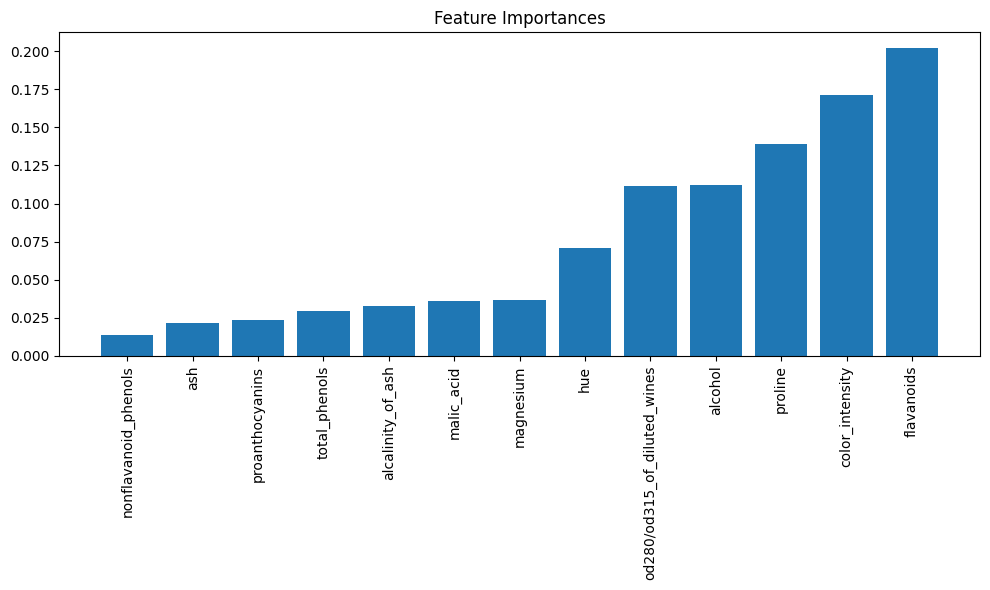

In [22]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_ #rf_model.feature_importances_ returns an array of importance scores (between 0 and 1)→ showing how important each feature is for making predictions in the Random Forest.
indices = np.argsort(importances)[::1] # np.argsort() sorts the feature importances in ascending order and [::-1] reverses it to descending order
features = x.columns # Gets the feature names from your dataset X so we can label the x-axis of the plot properly.

# Plotting the Feature Importances:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")

plt.bar(range(x.shape[1]), importances[indices], align="center")

## X.shape[1] gives you the number of columns (features) in the dataset X.
# range(X.shape[1]) creates a list of numbers like:
# [0, 1, 2, 3, ..., n-1]
# These numbers are used as x-axis positions for each bar.
#Each bar is placed at a position like 0, 1, 2, etc.

# rf_model.feature_importances_ gives you an array like:
# [0.18, 0.02, 0.11, ..., 0.07]
# representing how important each feature is.
# indices = np.argsort(importances)[::-1] sorts them from most to least important.
# importances[indices] rearranges the importances in sorted order.

# So this line in simple words:
# "Draw vertical bars at positions 0, 1, 2... for each feature, using their importance scores sorted from high to low, and center the bars on each tick."nter" → centers the bars on the ticks

plt.xticks(range(x.shape[1]), features[indices], rotation=90)

# range(x.shape[1])
# x.shape[1] is the number of features/columns in your dataset.
# range(x.shape[1]) gives a list like [0, 1, 2, ..., n-1]
# those are the x-axis positions where the bars are drawn (from the plt.bar(...) earlier).
# This tells Matplotlib: “These are the x positions where you need to put labels.”

# features[indices]
# features = x.columns gives the names of the features.
# indices = np.argsort(importances)[::-1] sorts feature indices from most to least important.
# features[indices] gives you the feature names in importance order.
# the most important feature appears first, then the second most important, etc.
# It aligns the correct label with the correct bar.

# So this line in simple words:
# “At x positions 0 to N, label each bar with the corresponding feature name (sorted by importance) and rotate the labels vertically for readability.”

plt.tight_layout()
plt.show()

That feature importance plot clearly shows that flavanoids, color_intensity, and proline are the top features contributing to wine classification 🍷✨

step 8: Bonus: Visualize a Single Decision Tree from the Random Forest

Although Random Forest is an ensemble of many trees, you can visualize one of them to understand how decisions are made.

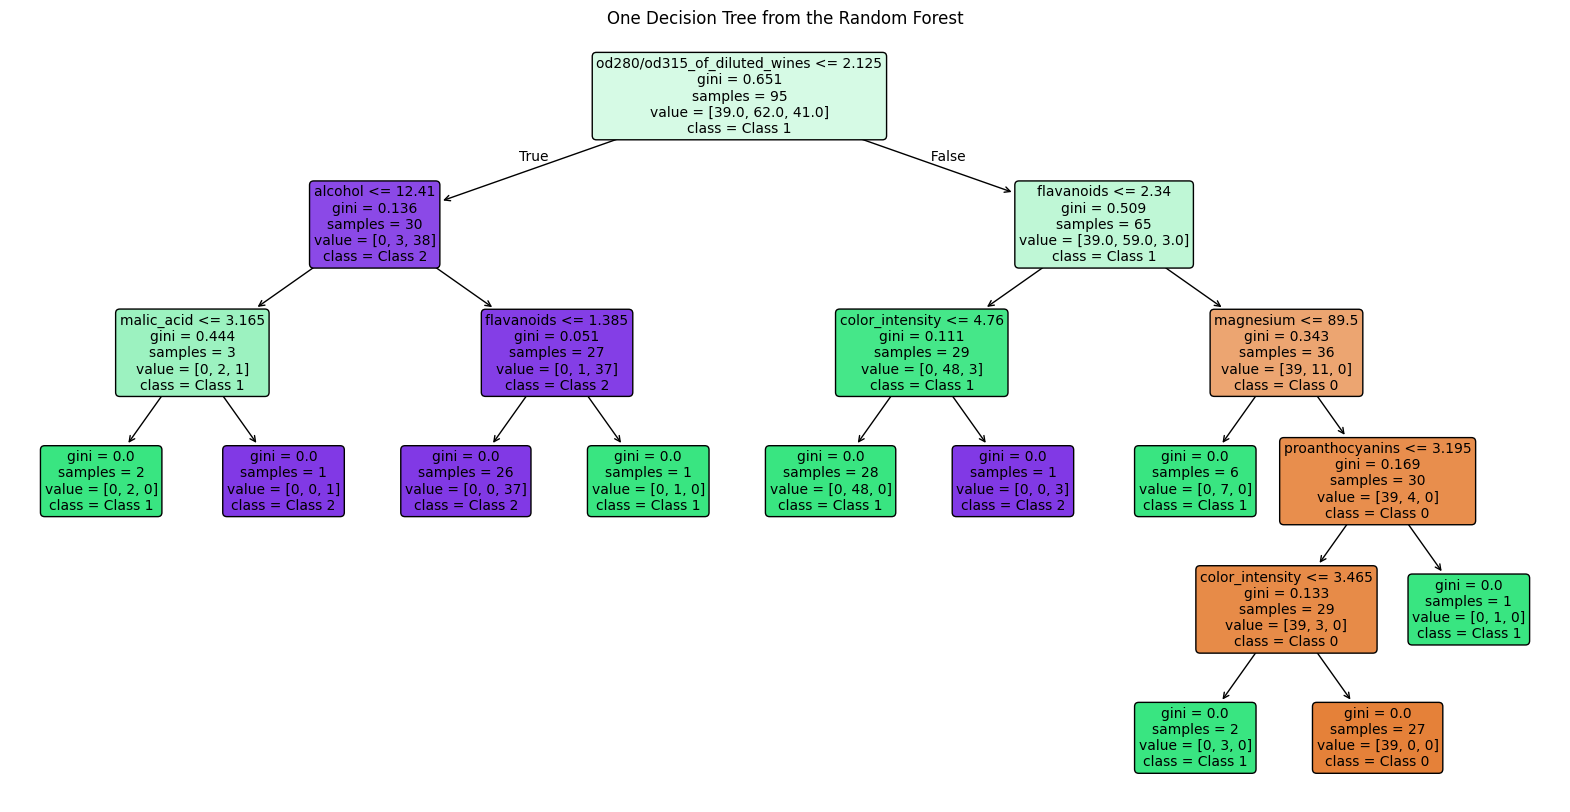

In [23]:
from sklearn.tree import plot_tree

# Plot one of the trees from the forest (e.g., the first one)
plt.figure(figsize=(20,10))

plot_tree(rf_model.estimators_[0], feature_names=x.columns, class_names=["Class 0","Class 1","Class 2"], filled=True, rounded=True, fontsize=10)

# rf_model.estimators_[0]
# rf_model is your Random Forest model.
# estimators_ is a list of all individual decision trees in the forest.
# estimators_[0] gets the first tree from that list.

# feature_names=X.columns
# Tells the tree to use your actual feature names (like 'mean radius', 'mean area') in the nodes instead of just X[0], X[1], etc.

# class_names=['Class 0', 'Class 1', 'Class 2']
# These are the labels for the target classes.

# filled=True
# Colors each node based on the majority class and how "pure" the split is.
# Darker color = more confident prediction.

# rounded=True
# Rounds the corners of the boxes in the tree.
# Just makes the plot look cleaner and more aesthetic.

# fontsize=10
# Sets the font size of text inside the tree.
# Important for readability since there are lots of text elements.

plt.title("One Decision Tree from the Random Forest")
plt.show()

## ✅ Final Notes

- This project demonstrates a complete classification pipeline using both **Decision Tree** and **Random Forest**.
- The **Random Forest model** outperformed the single decision tree, achieving **100% accuracy** on the test set.
- Most important features identified were `flavanoids`, `color_intensity`, `proline`, and `alcohol`.
- This project highlights how ensemble methods like Random Forest can reduce overfitting and improve model performance.
